<h1>Regression in Python</h1>

Dự đoán xu hướng giá cổ phiếu trong n ngày tiếp theo sử dụng dữ liệu lịch sử

# About Data

In [ ]:
!pip install vnstock3

In [ ]:
from vnstock3 import Vnstock
import os
import pandas as pd


if "ACCEPT_TC" not in os.environ:
    os.environ["ACCEPT_TC"] = "tôi đồng ý"
start = "2013-01-01"
end = '2024-01-01'
stock = Vnstock().stock(symbol='VIC', source='VCI')
df = stock.quote.history(start=start, end=end)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.to_csv(f'VIC_data.csv', index=False)

2024-06-02 09:51:07,480 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [ ]:
df = pd.read_csv('VIC_data.csv')
df

,time,open,high,low,close,volume
0,2013-01-02,16.91,17.44,16.80,17.01,106720
1,2013-01-03,17.01,17.01,16.80,17.01,118830
2,2013-01-04,17.01,17.12,16.80,17.01,162880
3,2013-01-07,17.12,17.87,17.12,17.76,370650
4,2013-01-08,17.97,18.08,17.76,17.97,363210
...,...,...,...,...,...,...
2741,2023-12-25,43.10,43.55,43.00,43.40,1977500
2742,2023-12-26,43.40,43.75,43.35,43.55,1763700
2743,2023-12-27,43.65,43.95,43.60,43.60,1848500
2744,2023-12-28,43.60,44.60,43.60,44.45,4070700


Đây là dataset về cổ phiếu từ ngày 2013-01-01 đến ngày 2024-01-01 thu thập từ vnstock. Bao gồm các trường:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| time           | Ngày ghi nhận                                                                         |
| symbol         | Ticker của cổ phiếu                                                                   |
| open           | Giá cổ phiếu lúc mở                                                                   |
| high           | Giá cổ phiếu cao nhất trong phiên                                                     |
| low            | Giá cổ phiếu thấp nhất trong phiên                                                    |
| close          | Giá cổ phiếu đóng cửa                                                                 |
| volume         | Số lượng cổ phiếu giao dịch                                                           |


# Preprocessing: Feature Engineering

## EDA (Explore Data Analysis)

Mục tiêu: Tìm feature tốt nhất phù hợp với mô hình

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = df.sort_values('time')

In [ ]:
df.drop(columns=['time'], inplace=True)

In [ ]:
# Check for missing values
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

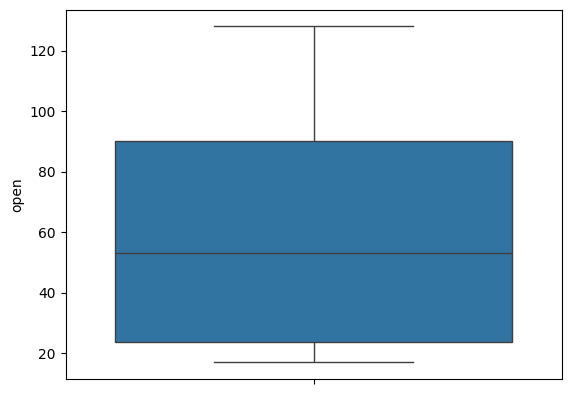

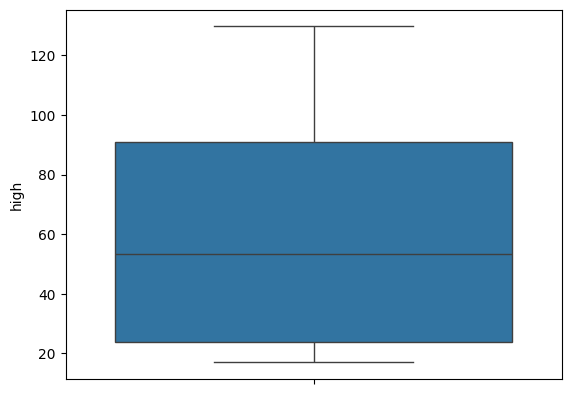

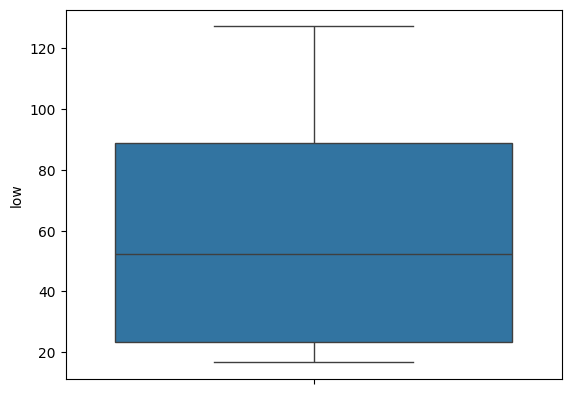

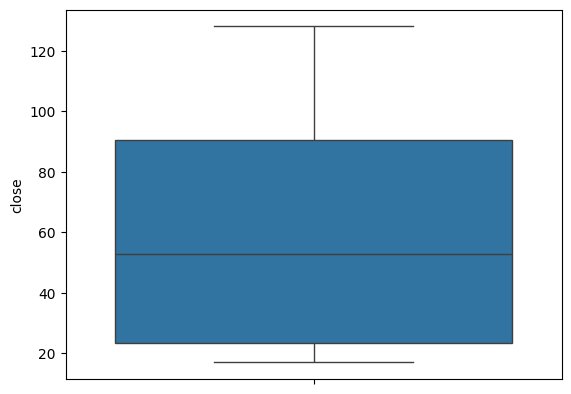

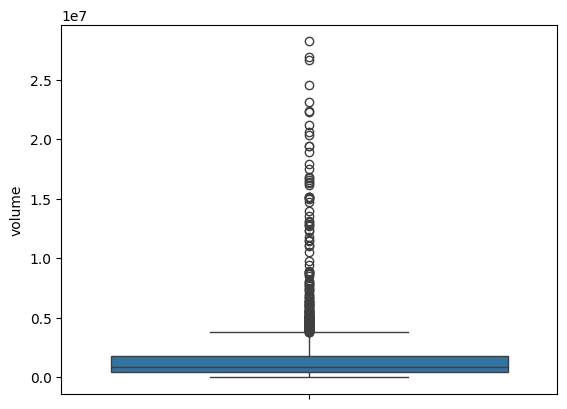

In [ ]:
# Check for outliers
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

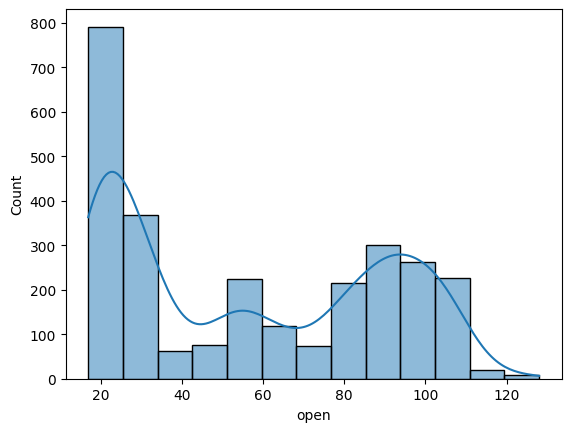

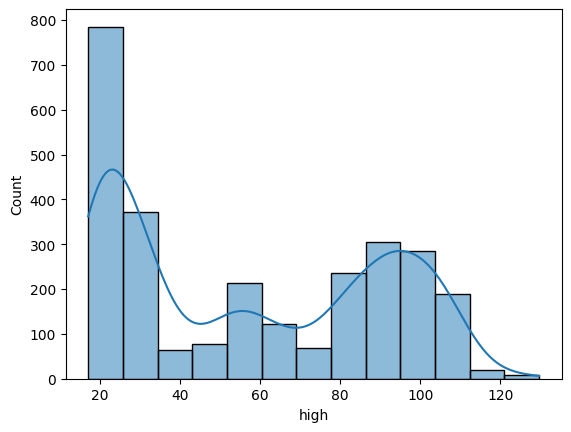

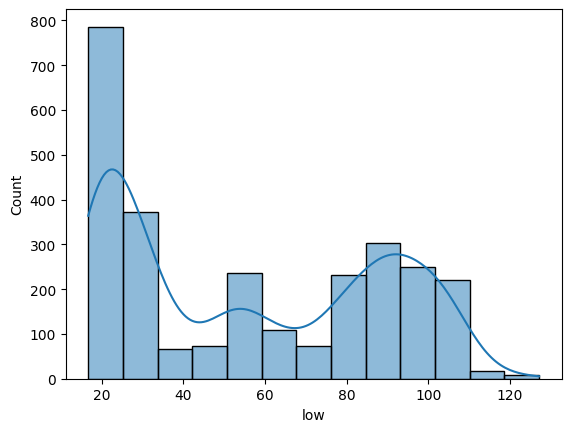

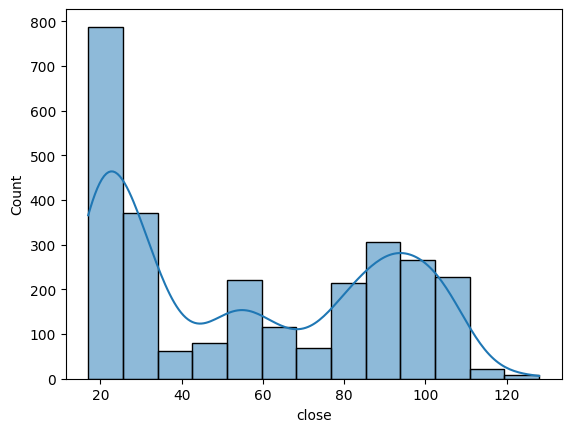

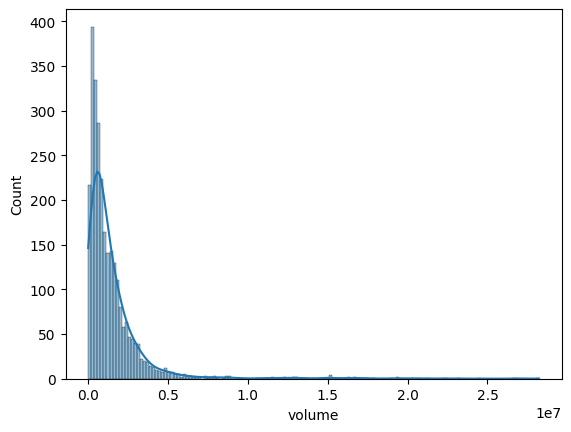

In [ ]:
# check normality of each column
for col in df.columns:
  sns.histplot(df[col], kde=True)
  plt.show()

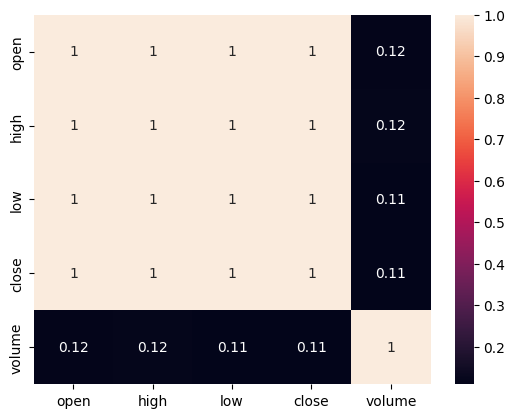

In [ ]:
# Check for correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Nhận xét:
- Target value (Close): Phụ thuộc vào low, high, open nhiều nhất

Drop none value

In [ ]:
df.dropna().reset_index(drop=True)

,open,high,low,close,volume
0,16.91,17.44,16.80,17.01,106720
1,17.01,17.01,16.80,17.01,118830
2,17.01,17.12,16.80,17.01,162880
3,17.12,17.87,17.12,17.76,370650
4,17.97,18.08,17.76,17.97,363210
...,...,...,...,...,...
2741,43.10,43.55,43.00,43.40,1977500
2742,43.40,43.75,43.35,43.55,1763700
2743,43.65,43.95,43.60,43.60,1848500
2744,43.60,44.60,43.60,44.45,4070700


## Feature Selection

In [ ]:
X = ...
Y = ...

## Data Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape

## Feature Scale
* Min max Scale
* Standard Scale

...

# Regression

Thực nghiệm với các model sau:
* Linear regression
* Support Vector Machine
* Descision Tree
* Random Forest

Note:
* Có thể sử dụng thư viện có sẵn scikit-learn, Scipy

## Linear Regression

## Support Vector Machine

## Decision Tree

## Random Forest

# Model Evaluation using Test set

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error


Ghi lại kết quả của 4 model

| Algorithm          | MSE     | MAPE     | MAE     |
| ------------------ | ------- | -------- | ------- |
| Linear Regression  | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| Random Forest      | ?       | ?        | ?       |
